# Exploratory data analysis

In [3]:
## importing requred packages 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly

In [4]:
data = pd.read_csv('GUIDE_Train_cl.csv')

data = data.iloc[:, 1:]
data.head()

Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0   249108107265    108      144844   118616           6           5   
1   755914248188     24       71757    48212           1           1   
2   927712937744     45       29568   358611           6           5   
3  1022202220114      3      176549   237522           6           5   
4   300647710795     67        7601    13711           1           1   

   Category  IncidentGrade  EntityType  EvidenceRole  ...  ResourceIdName  \
0        10              2          20             1  ...            3586   
1        10              2          20             1  ...            3586   
2        10              1          20             1  ...            3586   
3        10              0          20             1  ...            3586   
4        10              0          20             1  ...            3586   

   OSFamily  OSVersion  CountryCode  State   City  year  month  date  hour  
0         5         66          242   1445  10630  2024      6    13    15  
1         5         66          242   1445  10630  2024      6     7     0  
2         5         66          242   1445  10630  2024      6    11    15  
3         5         66          242   1445  10630  2024      6     5    13  
4         5         66          242   1445  10630  2024      6     9     1  

[5 rows x 38 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79279 entries, 0 to 79278
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Id                  79279 non-null  int64
 1   OrgId               79279 non-null  int64
 2   IncidentId          79279 non-null  int64
 3   AlertId             79279 non-null  int64
 4   DetectorId          79279 non-null  int64
 5   AlertTitle          79279 non-null  int64
 6   Category            79279 non-null  int64
 7   IncidentGrade       79279 non-null  int64
 8   EntityType          79279 non-null  int64
 9   EvidenceRole        79279 non-null  int64
 10  DeviceId            79279 non-null  int64
 11  Sha256              79279 non-null  int64
 12  IpAddress           79279 non-null  int64
 13  Url                 79279 non-null  int64
 14  AccountSid          79279 non-null  int64
 15  AccountUpn          79279 non-null  int64
 16  AccountObjectId     79279 non-null  int6

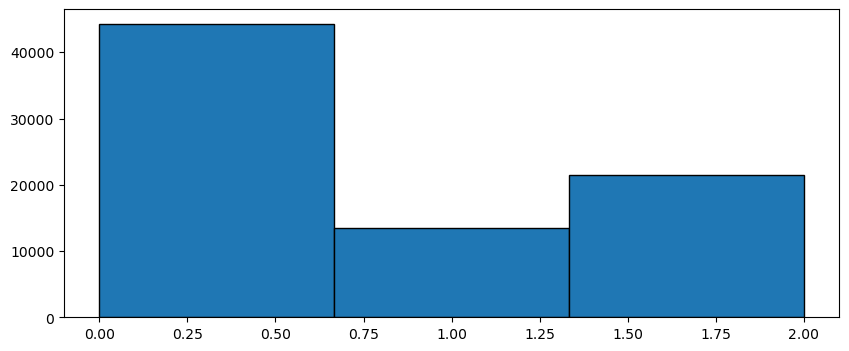

In [33]:
plt.figure(figsize=(10, 4))
plt.hist(data['IncidentGrade'], bins=3, edgecolor='black')
plt.show()

In [51]:
categorical, numerical = [], []

for feature in data.columns:
    if data[feature].nunique() <= 10:
        categorical.append(feature)
    else: numerical.append(feature)

print(len(categorical))
print(len(numerical))

32
6


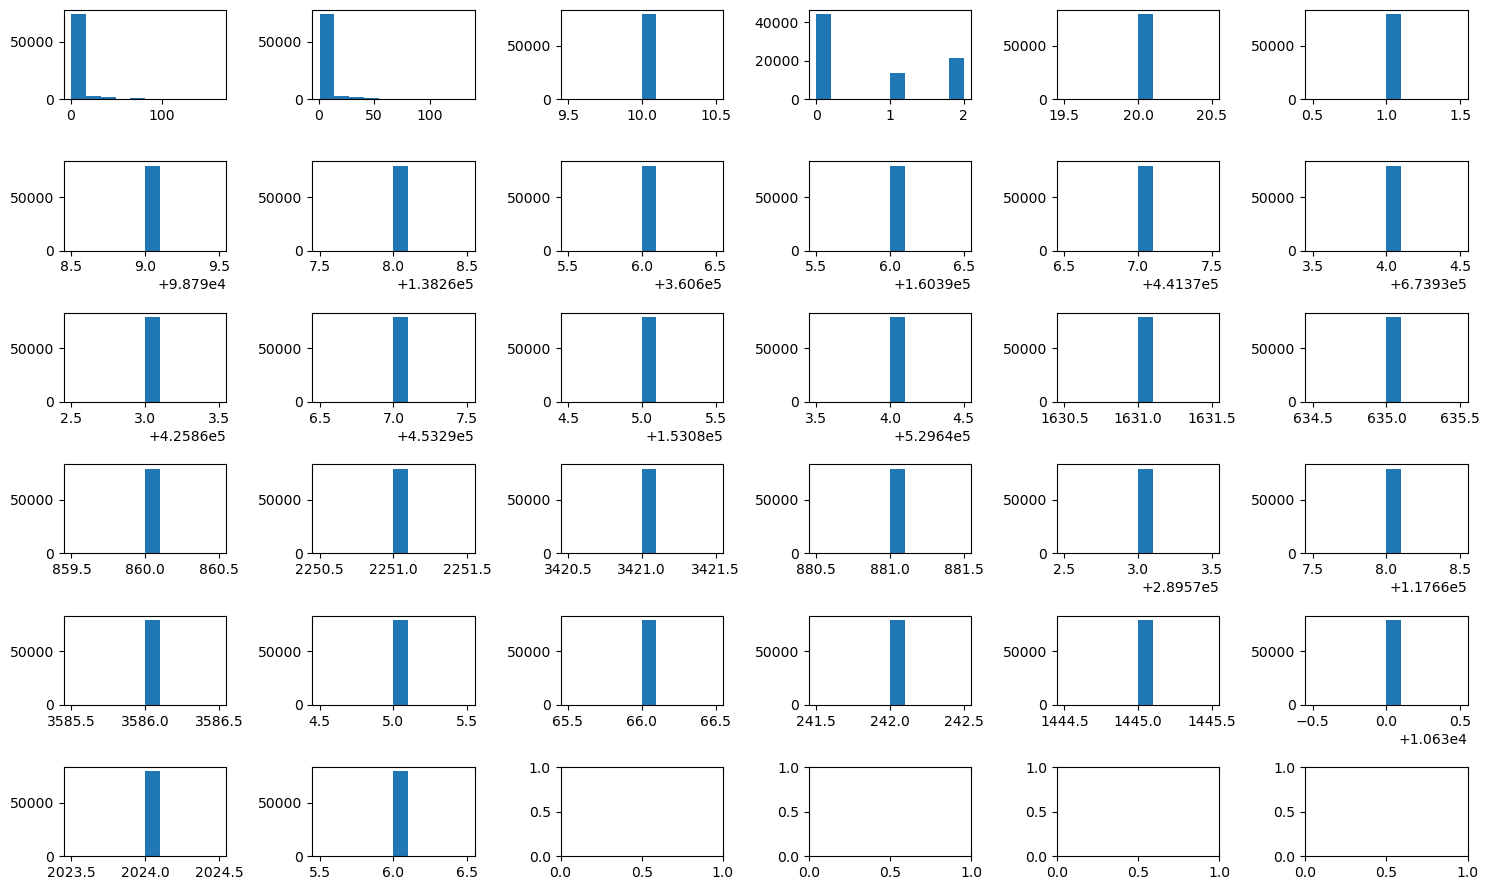

In [61]:
# vizualizing categorical features

fig, ax = plt.subplots(6,6, figsize=(15, 9))
ax = ax.flatten()
for i, feature in enumerate(categorical):
    ax[i].hist(data[feature])

plt.tight_layout()
plt.show()

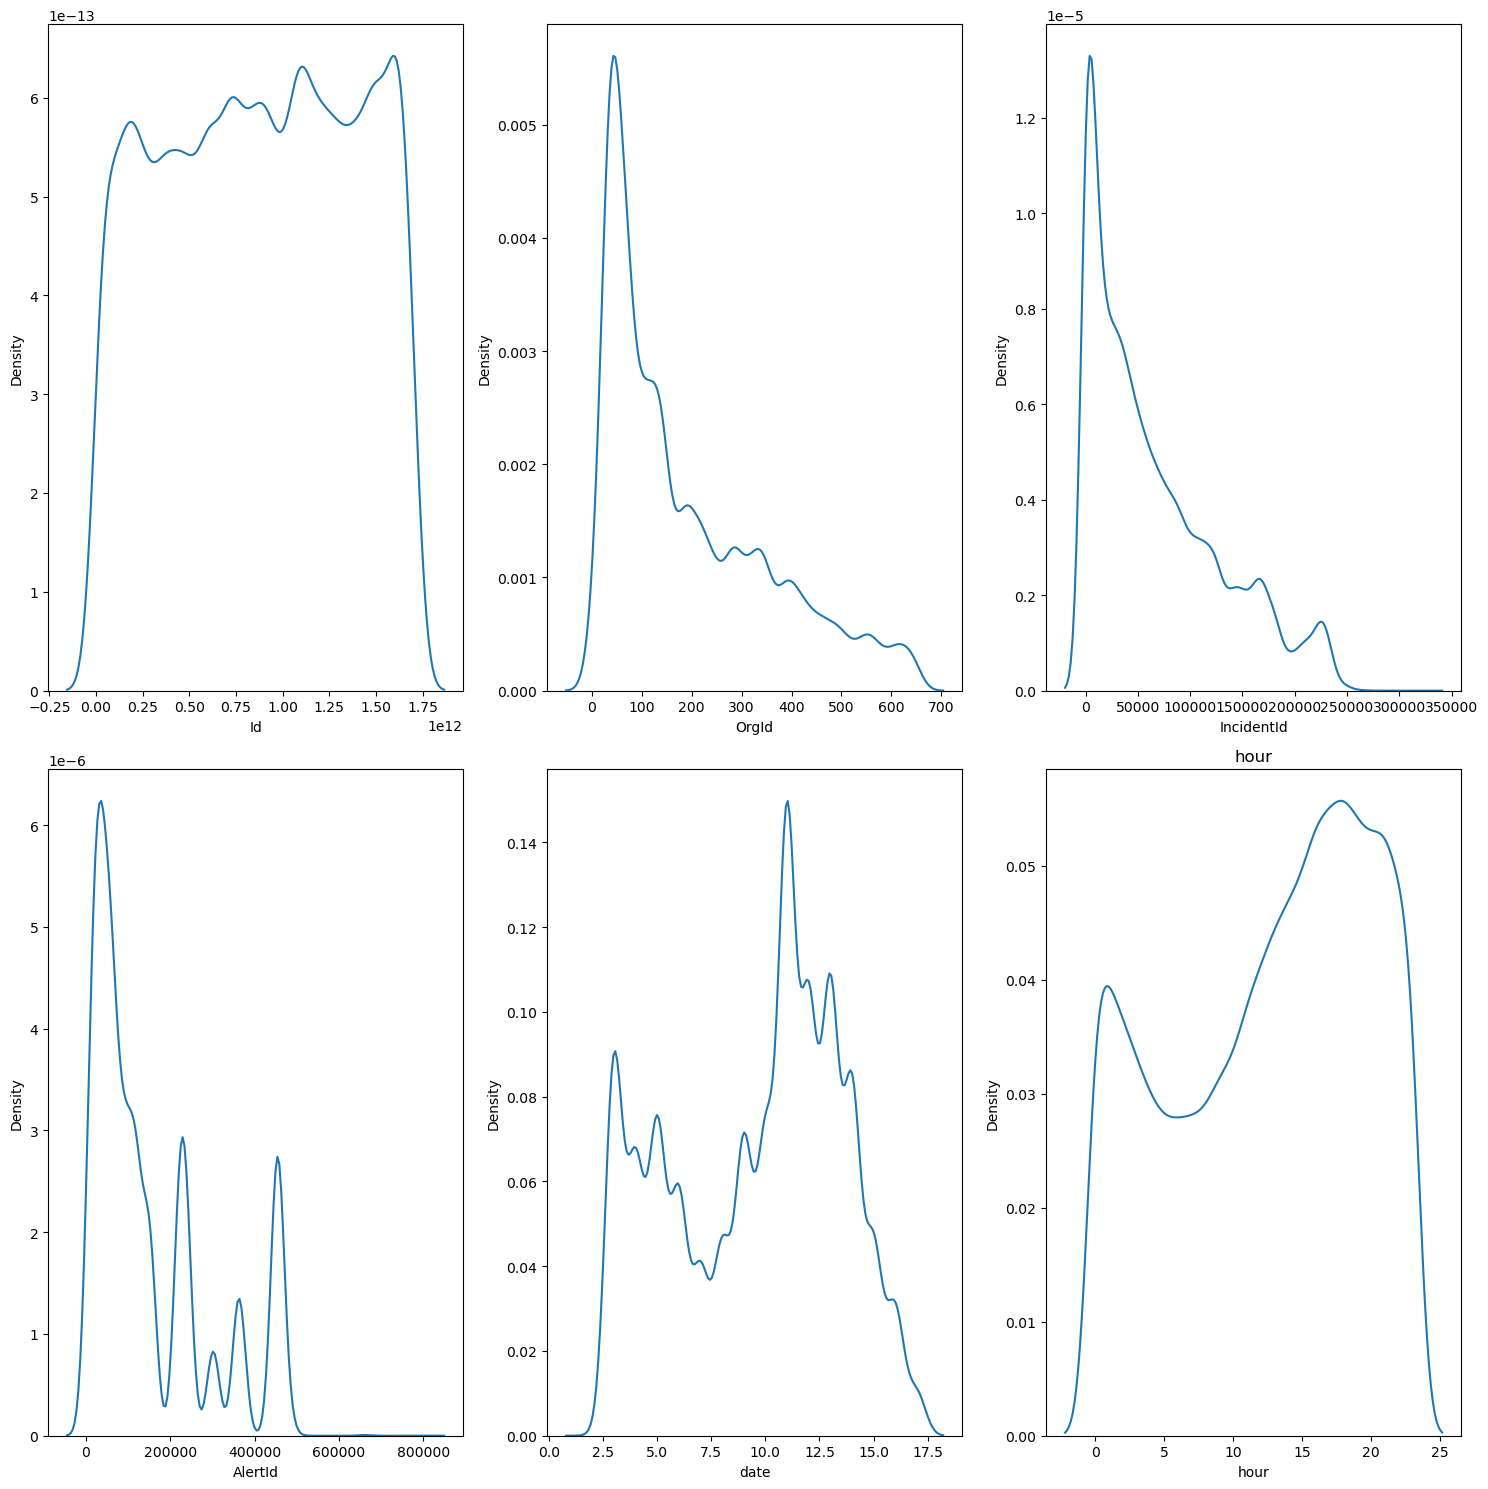

In [68]:
# plotting numerical data

fig, ax = plt.subplots(2, 3, figsize=(15, 15))
ax= ax.flatten()

for i, feature in enumerate(numerical):
    sns.kdeplot(data[feature], ax=ax[i])
    plt.title(feature)

plt.tight_layout()
plt.show()


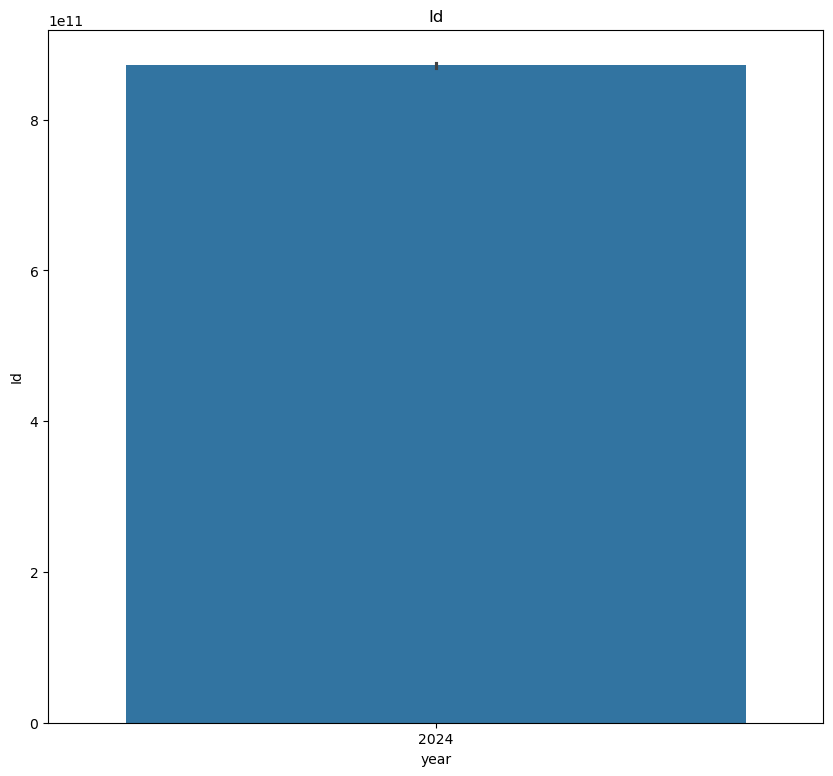

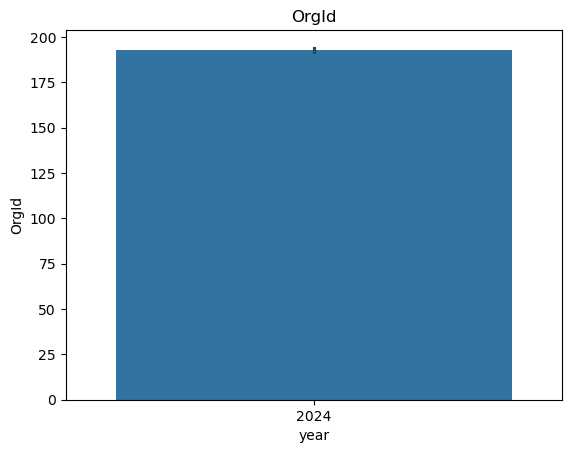

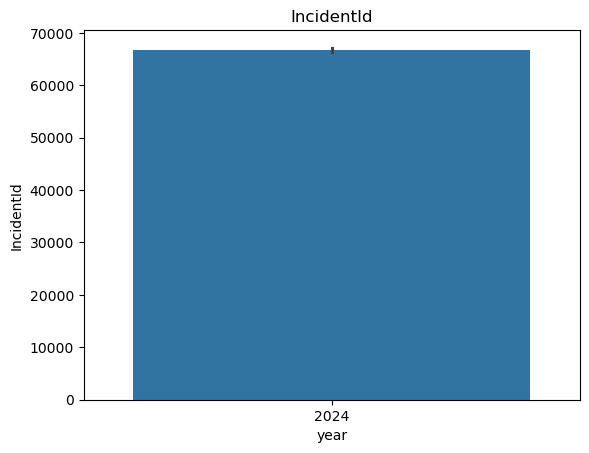

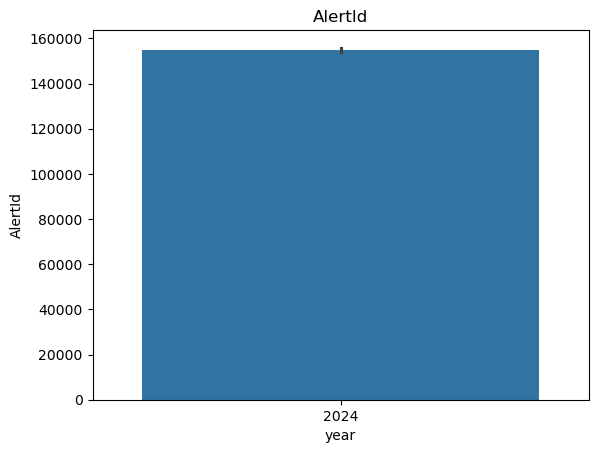

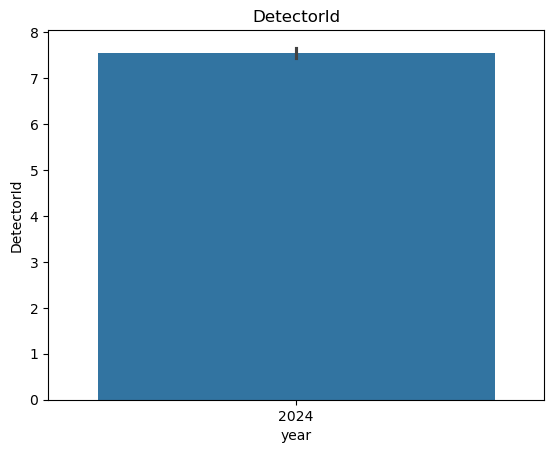

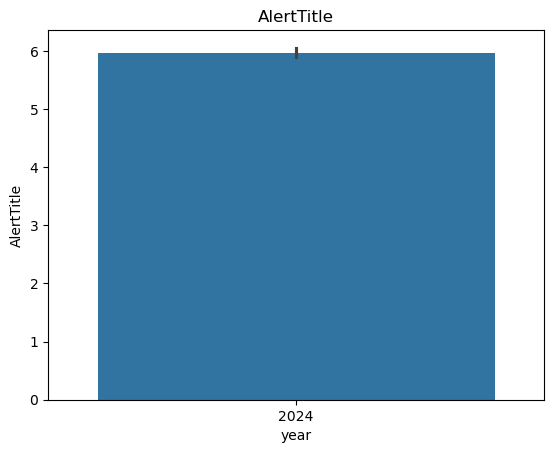

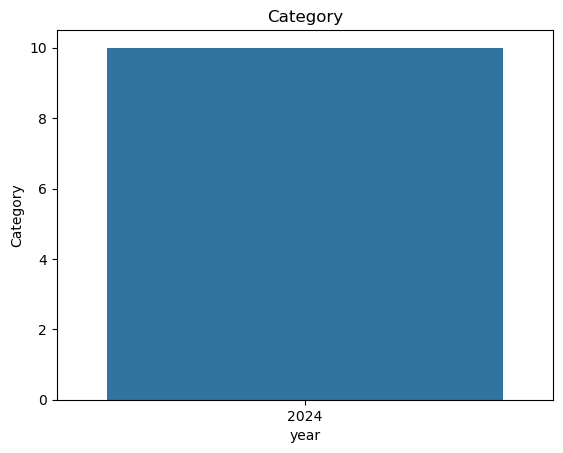

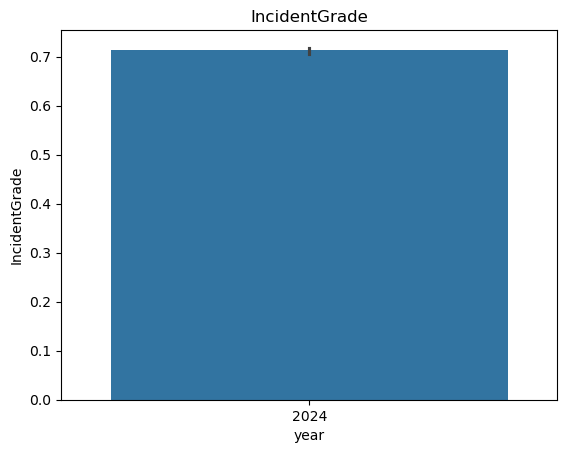

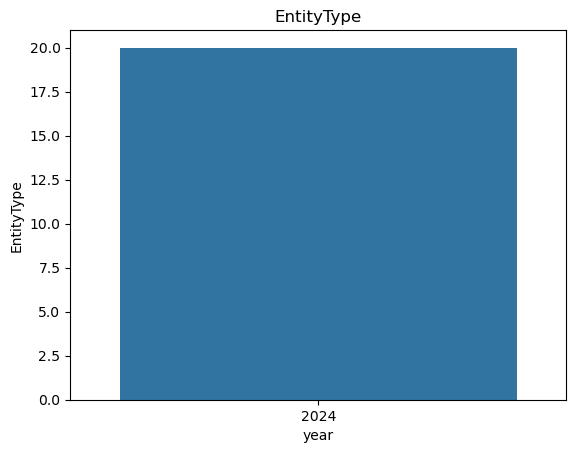

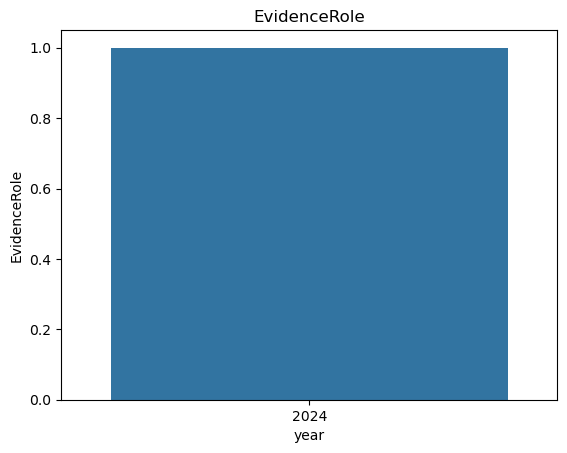

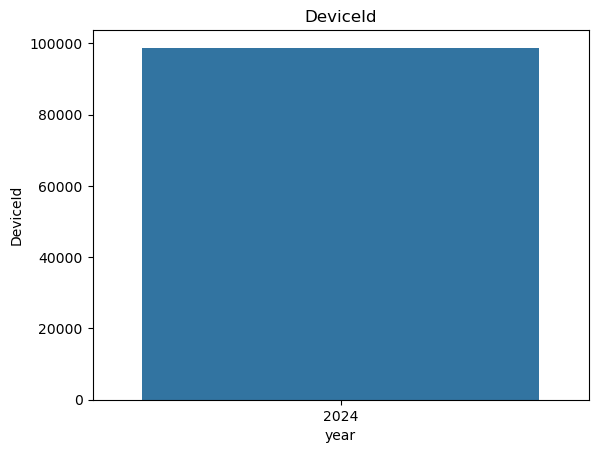

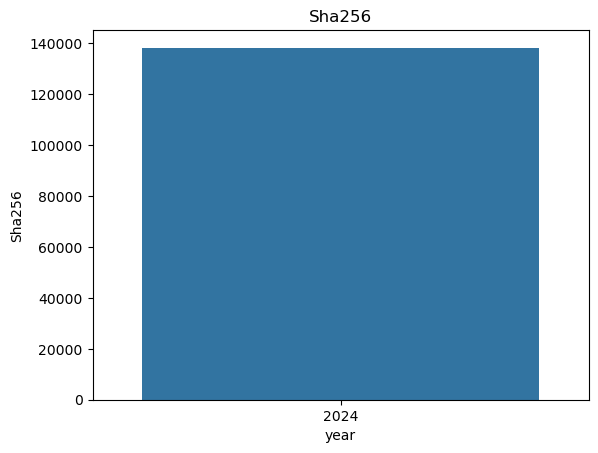

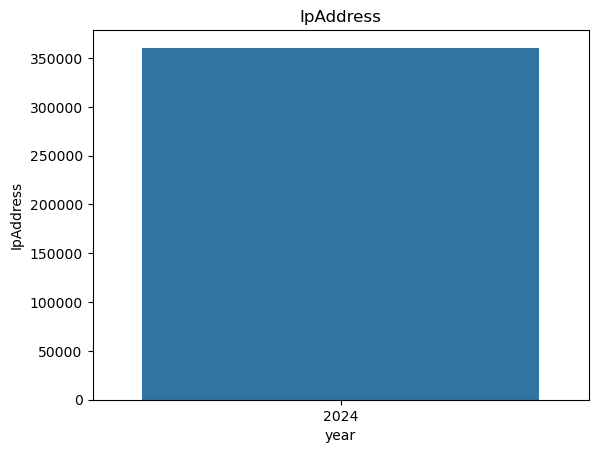

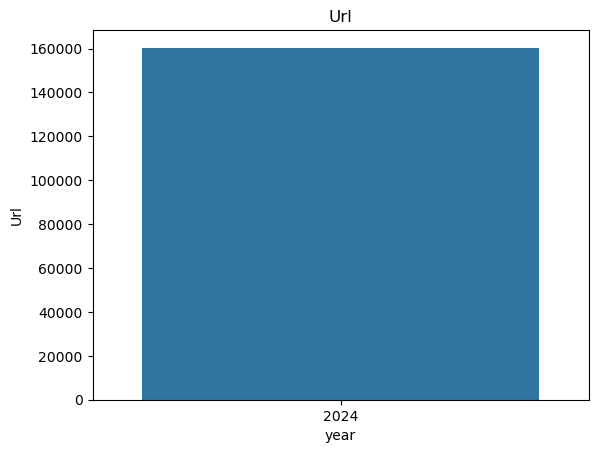

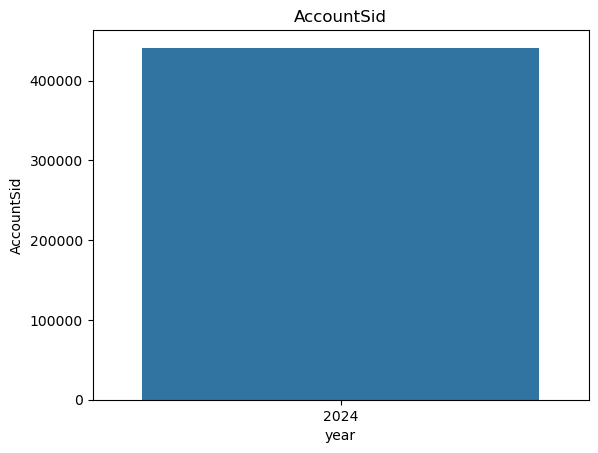

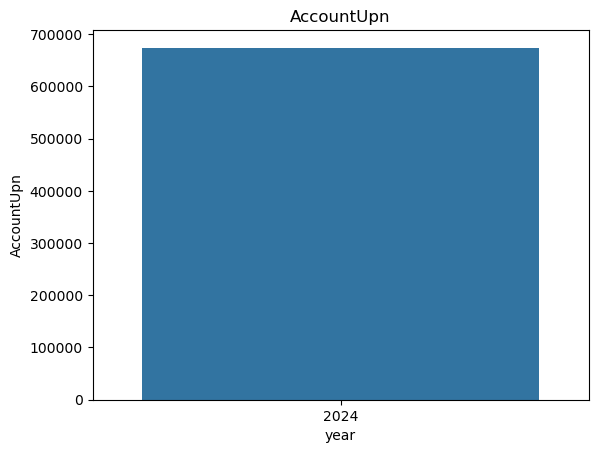

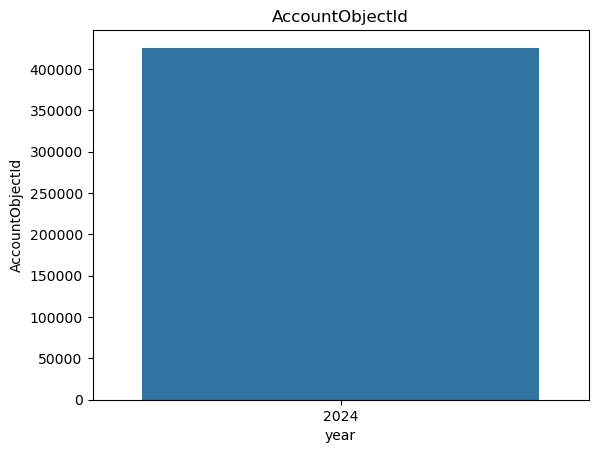

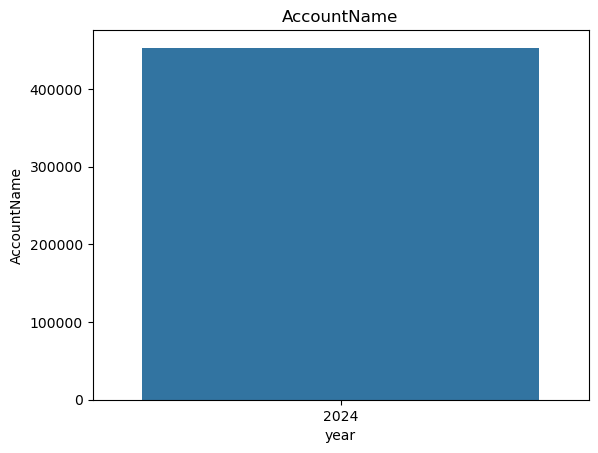

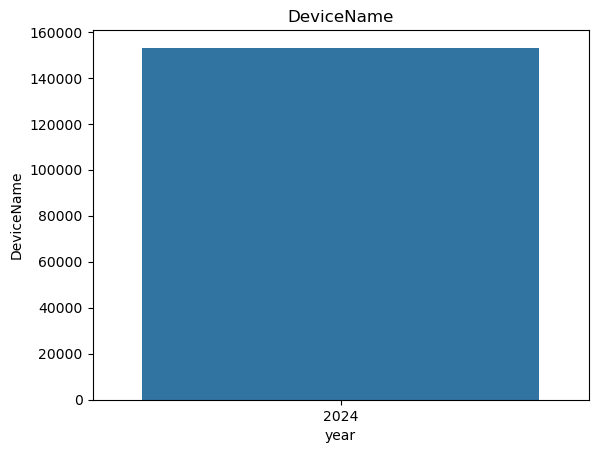

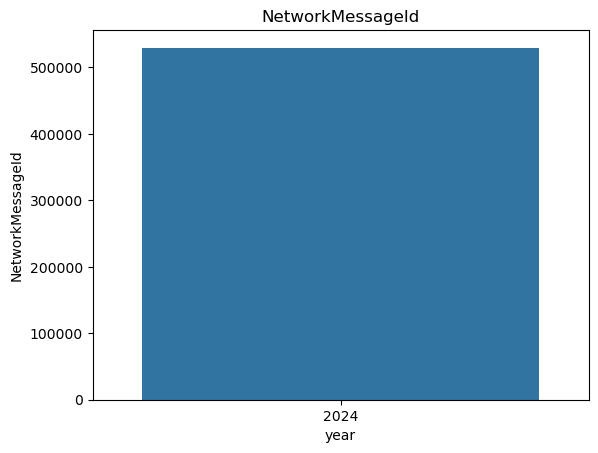

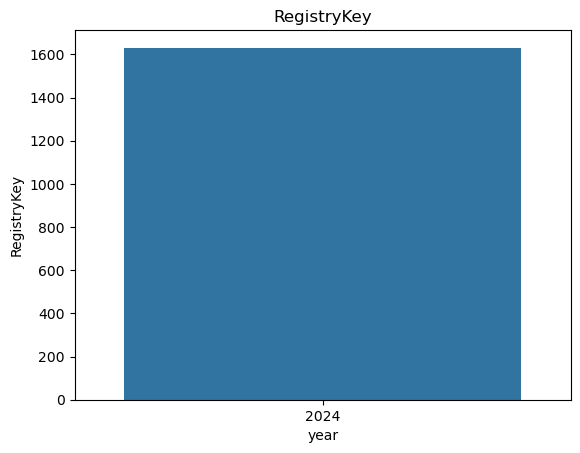

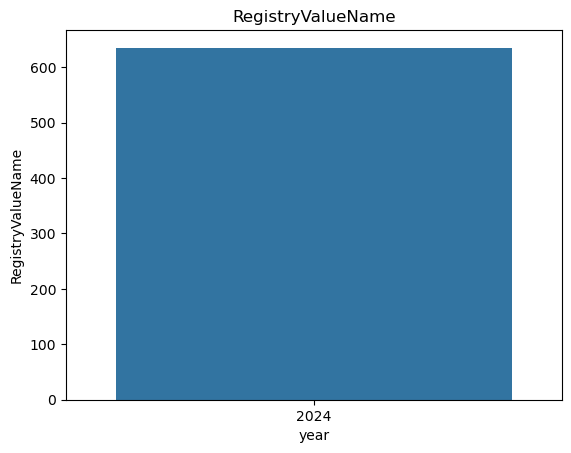

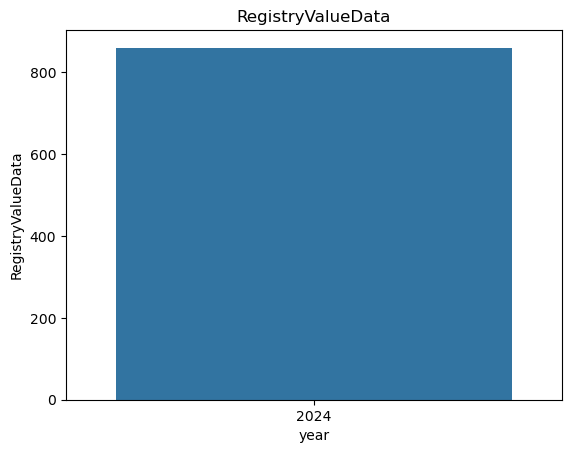

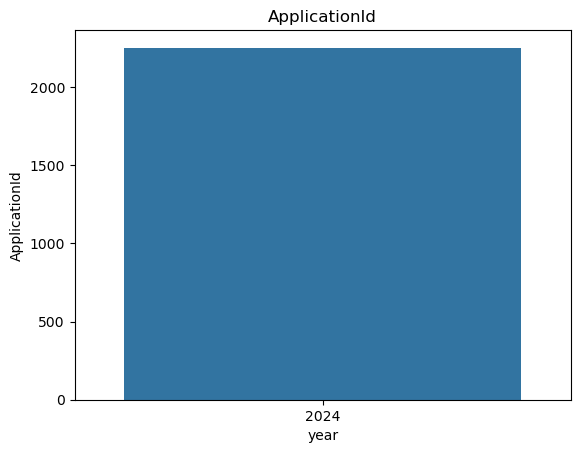

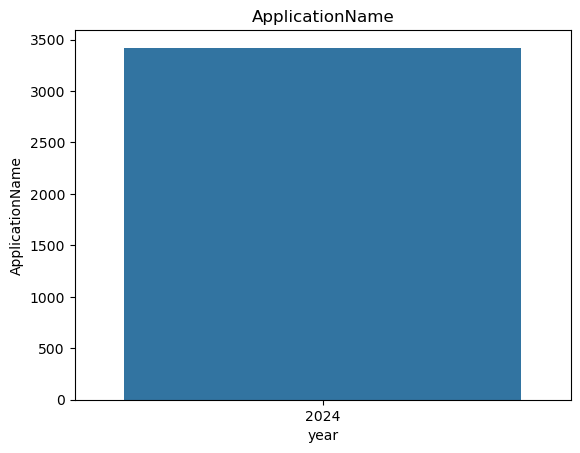

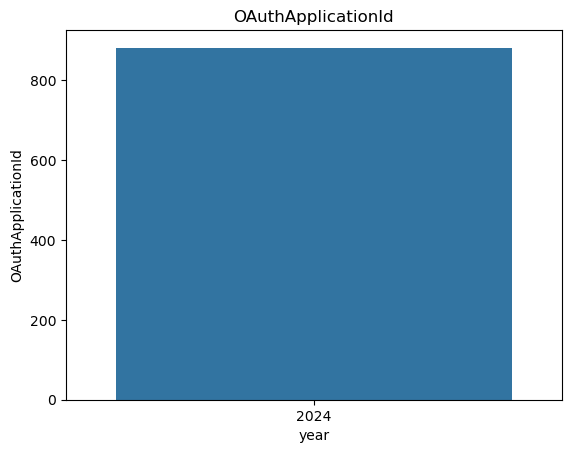

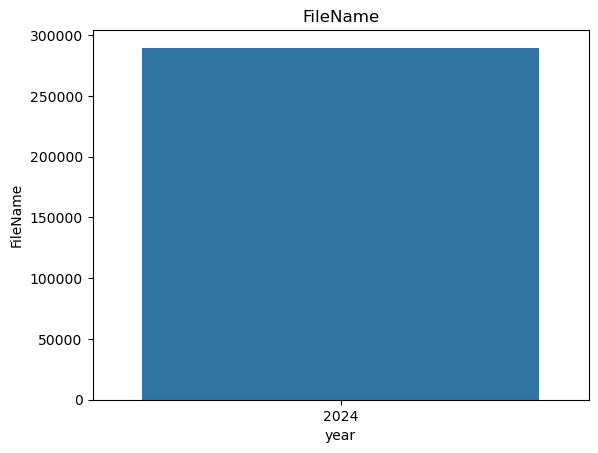

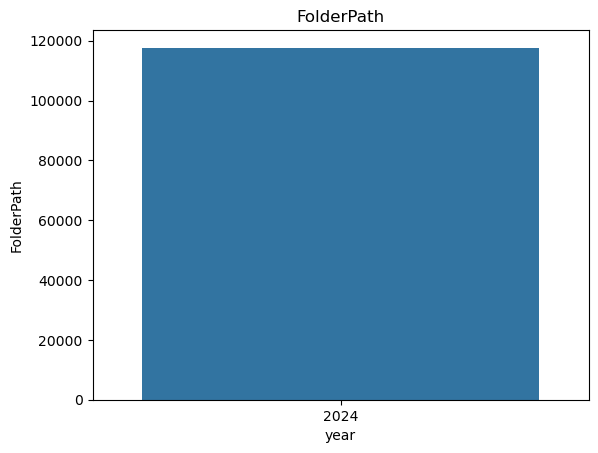

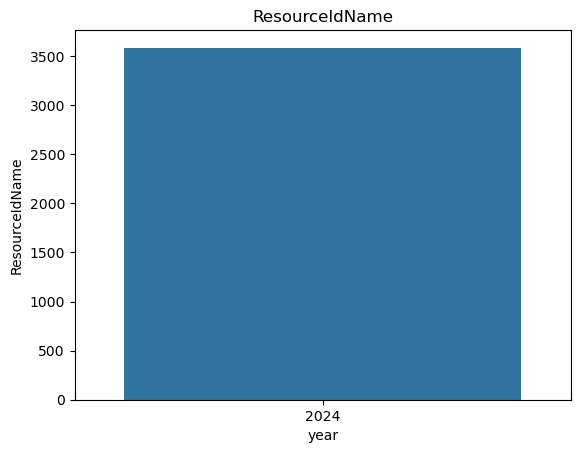

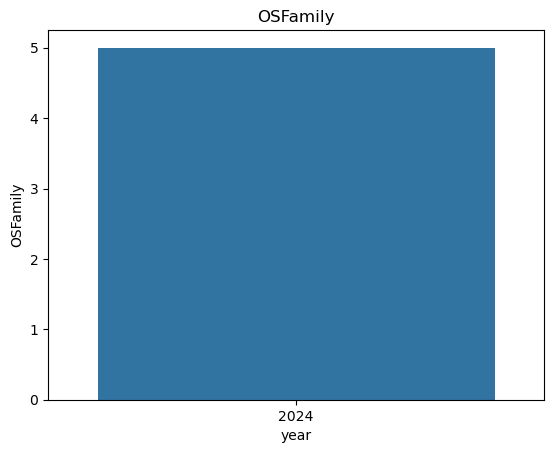

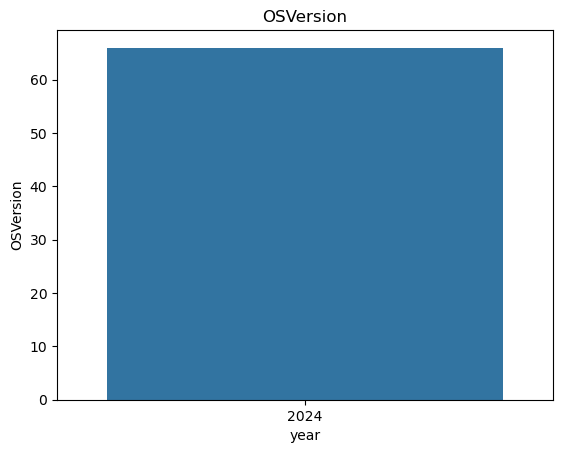

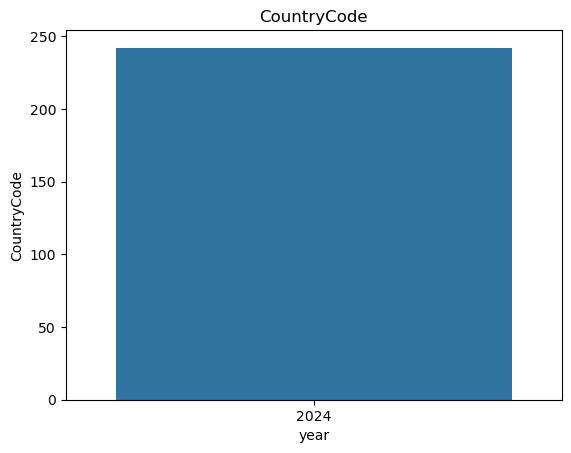

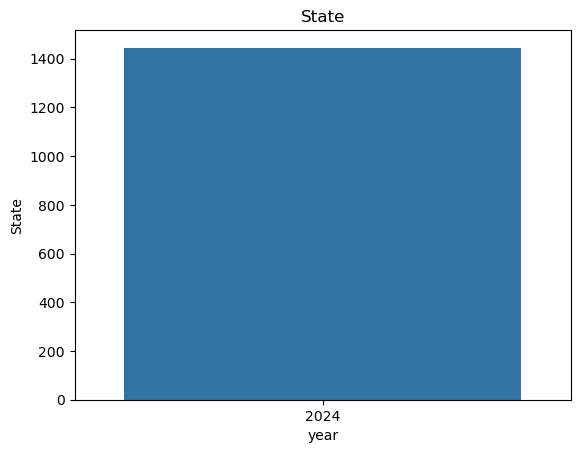

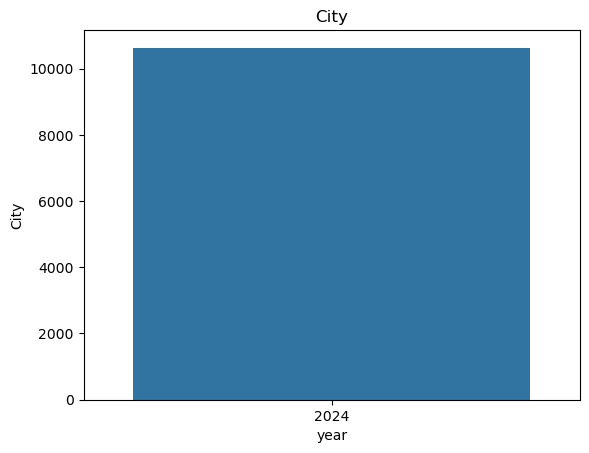

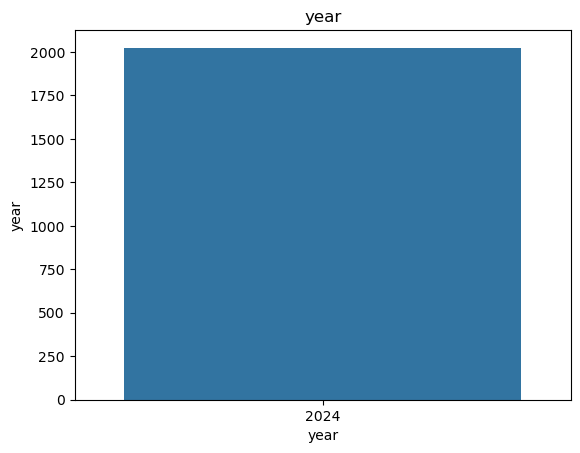

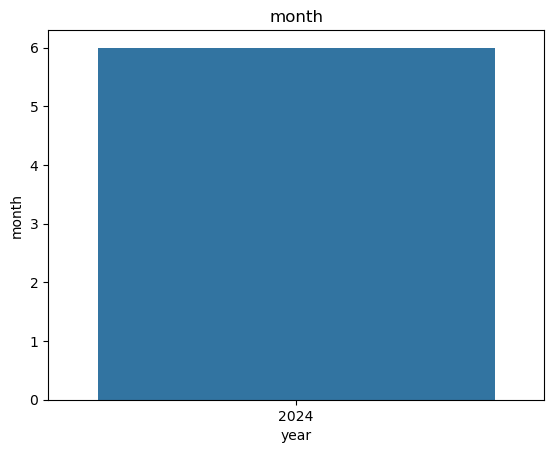

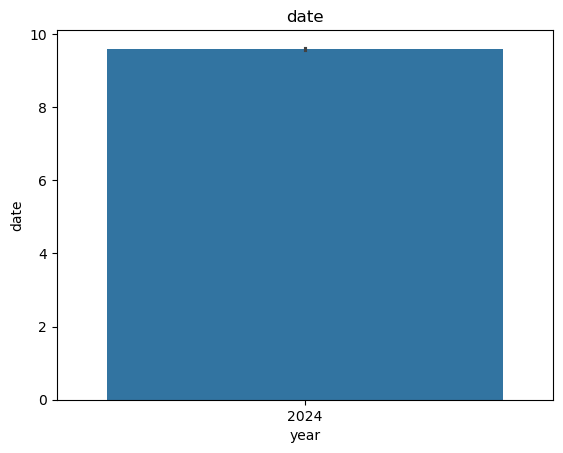

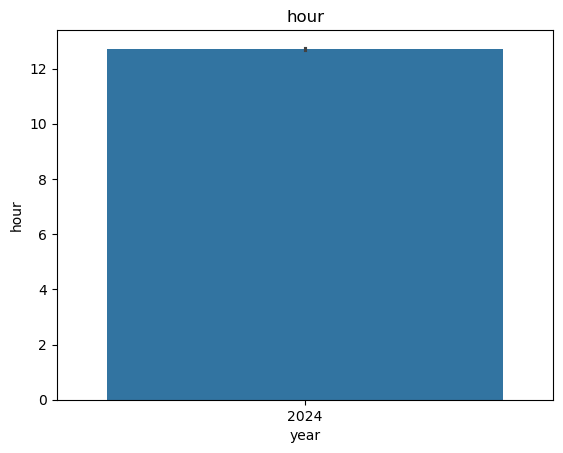

In [70]:
## line plot based on year

plt.figure(figsize=(10, 5))

for i in data.columns:
    sns.barplot(data=data, x=data['year'], y=data[i])
    plt.title(i)
    plt.show()

In [76]:
# pairplot

plt.figure(figsize=(15, 9))

sns.pairplot(data)

plt.show()

<Figure size 1500x900 with 0 Axes>

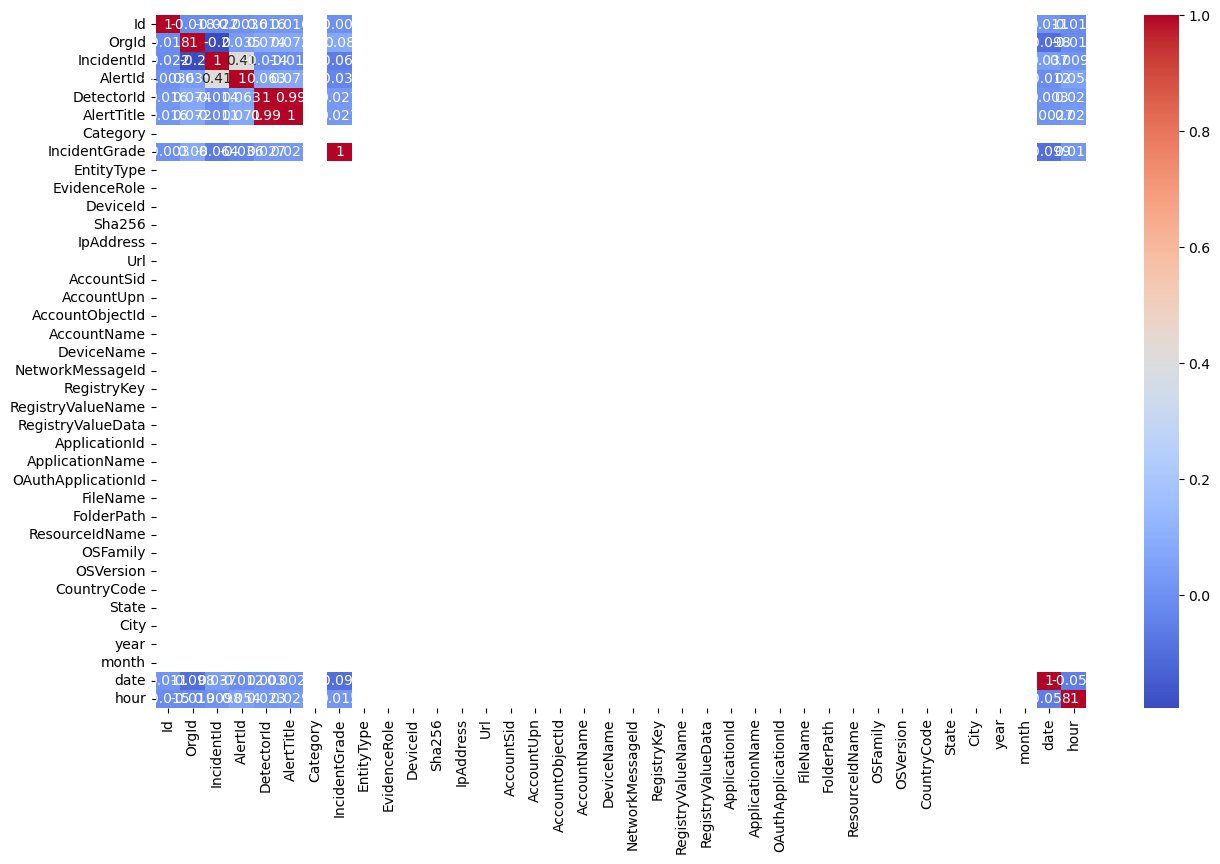

In [77]:
## correlation heatmap

data_corr = data.corr()

plt.figure(figsize=(15, 9))

sns.heatmap(data=data_corr, annot=True, cmap='coolwarm')

plt.show()